Результат парсинга данных находится в файле auto.csv. Перед тем как загружать данные в базу данных их необходимо проверить и почистить 

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install transliterate

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import requests
import json
import transliterate as trsl
import re
from sklearn.linear_model import LinearRegression, SGDClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
def translate(text, IAM_TOKEN, folder_id):
    """
    Translates text from url with Yandex translate API.
    More information how to use it: https://cloud.yandex.ru/docs/translate/api-ref/authentication
    :param text: string for translating
    :param IAM_TOKEN: Token getting on Yandex Cloud. Need to enter 'yc iam create-token' in cmd to get IAM token
    :param folder_id: id of a folder on Yandex Cloud
    :return: Translated text
    """
    target_language = 'ru'
    body = {"targetLanguageCode": target_language,
            "texts": text,
            "folderId": folder_id,}
    headers = {"Content-Type": "application/json",
               "Authorization": "Bearer {0}".format(IAM_TOKEN)}
    response = requests.post('https://translate.api.cloud.yandex.net/translate/v2/translate',
                             json=body,
                             headers=headers)
    res = json.loads(response.text)
    return res["translations"][0]["text"].title()

In [8]:
IAM_TOKEN = ""  # Token getting on Yandex Cloud. Need to enter 'yc iam create-token' in cmd to get IAM token
folder_id = ""  # id of a folder on Yandex Cloud

In [9]:
regions = {'01': 'Республика Адыгея', '02': 'Республика Башкортостан', '03': 'Республика Бурятия',
           '04': 'Республика Алтай (Горный Алтай)', '05': 'Республика Дагестан', '06': 'Республика Ингушетия',
           '07': 'Кабардино-Балкарская Республика', '08': 'Республика Калмыкия', '09': 'Карачаево-Черкесская Республика',
           '10': 'Республика Карелия', '11': 'Республика Коми', '12': 'Республика Марий Эл', '13': 'Республика Мордовия',
           '14': 'Республика Саха (Якутия)', '15': 'Республика Северная Осетия — Алания', '16': 'Республика Татарстан',
           '17': 'Республика Тыва', '18': 'Удмуртская Республика', '19': 'Республика Хакасия', '21': 'Чувашская Республика',
           '22': 'Алтайский край', '23': 'Краснодарский край', '24': 'Красноярский край', '25': 'Приморский край',
           '26': 'Ставропольский край', '27': 'Хабаровский край', '28': 'Амурская область', '29': 'Архангельская область',
           '30': 'Астраханская область', '31': 'Белгородская область', '32': 'Брянская область', '33': 'Владимирская область',
           '34': 'Волгоградская область', '35': 'Вологодская область', '36': 'Воронежская область', '37': 'Ивановская область',
           '38': 'Иркутская область', '39': 'Калининградская область', '40': 'Калужская область', '41': 'Камчатский край',
           '42': 'Кемеровская область', '43': 'Кировская область', '44': 'Костромская область', '45': 'Курганская область',
           '46': 'Курская область', '47': 'Ленинградская область', '48': 'Липецкая область', '49': 'Магаданская область',
           '50': 'Московская область', '51': 'Мурманская область', '52': 'Нижегородская область', '53': 'Новгородская область',
           '54': 'Новосибирская область', '55': 'Омская область', '56': 'Оренбургская область', '57': 'Орловская область',
           '58': 'Пензенская область', '59': 'Пермский край', '60': 'Псковская область', '61': 'Ростовская область',
           '62': 'Рязанская область', '63': 'Самарская область', '64': 'Саратовская область', '65': 'Сахалинская область',
           '66': 'Свердловская область', '67': 'Смоленская область', '68': 'Тамбовская область', '69': 'Тверская область',
           '70': 'Томская область', '71': 'Тульская область', '72': 'Тюменская область', '73': 'Ульяновская область',
           '74': 'Челябинская область', '75': 'Забайкальский край', '76': 'Ярославская область', '77': 'Москва',
           '78': 'Санкт-Петербург', '79': 'Еврейская автономная область', '82': 'Республика Крым',
           '83': 'Ненецкий автономный округ', '86': 'Ханты-Мансийский автономный округ — Югра',
           '87': 'Чукотский автономный округ', '89': 'Ямало-Ненецкий автономный округ', '92': 'Севастополь',
           '94': 'Территории за пределами РФ, обслуживаемые Департаментом режимных объектов МВД России',
           '95': 'Чеченская Республика'}

In [10]:
cities_db = pd.read_csv("cities.csv", sep=";", encoding="utf-8")

In [11]:
df = pd.read_csv("auto.csv", sep=";", encoding="utf-8")

In [12]:
df.head()

,vin,is_owner,is_promo,region,city,brand,model,year,mileage,count_owners,...,body_type,modification,num_doors,gearbox_type,wheel_drive,steering_wheel,link,ad_date,avito_id,model_uid
0,NaN,True,NaN,Владимирская область,Владимир,ВАЗ (LADA),Granta,2014.0,57770.0,3,...,Седан,1.6 MT (82 л.с.),4.0,Механика,Передний,Левый,https://www.avito.ru/vladimir/avtomobili/vaz_l...,2023-08-13,3.145463e+09,0QPyxtx
1,NaN,True,NaN,Владимирская область,Александровский р-н,ВАЗ (LADA),2109,1991.0,145000.0,2,...,Хетчбэк,1.3 MT (64 л.с.),5.0,Механика,Передний,Левый,https://www.avito.ru/aleksandrov/avtomobili/va...,2023-08-13,3.270866e+09,EXy5PHk
2,NaN,True,NaN,Владимирская область,Ковров,ВАЗ (LADA),2115 Samara,2006.0,230000.0,4+,...,Седан,1.5 MT (76 л.с.),4.0,Механика,Передний,Левый,https://www.avito.ru/kovrov/avtomobili/vaz_lad...,2023-08-13,3.166892e+09,3EvvVFx
3,NaN,False,NaN,Владимирская область,Владимир,ВАЗ (LADA),Priora,2009.0,156500.0,4+,...,Седан,1.6 MT (98 л.с.),4.0,Механика,Передний,Левый,https://www.avito.ru/vladimir/avtomobili/vaz_l...,2023-08-13,3.265563e+09,o2drKfx
4,NaN,False,NaN,Владимирская область,Владимир,УАЗ,Patriot,2023.0,134000.0,1,...,Внедорожник,2.7 MT (135 л.с.),5.0,Механика,Полный,Левый,https://www.avito.ru/vladimir/avtomobili/uaz_p...,2023-08-07,3.184416e+09,5ZdnrHx


In [13]:
df.shape

(6189, 28)

В ходе отбора возникали непредвиденные ошибки, которые могли привести к поялению пустых записей. Также некоторое время некорректно работал алгоритм проверки объявления на то, имеется ли оно уже в базе данных и в файле csv. Исключим дубликаты и пустые строки

In [14]:
df.drop(df[df.isna().all(1)].index, inplace=True)  # delete rows with all NaN
df.drop_duplicates("avito_id", inplace=True)
df.shape

(4363, 28)

Как видно, таких строк оказалось больше четверти. 
Проверим строки на наличие пустых значений

In [15]:
df.isna().sum()

vin               4363
is_owner             0
is_promo          4363
region               0
city                35
brand                0
model                0
year                 0
mileage              0
count_owners         0
air_condition        0
color                0
price                0
en_capacity          0
en_type              0
en_power             0
num_cylinders      277
fuel_waste_mix     659
body_type            0
modification         0
num_doors            0
gearbox_type         0
wheel_drive         33
steering_wheel       0
link                 0
ad_date              0
avito_id             0
model_uid            0
dtype: int64

Поля vin и is_promo полностью заполнены нулями поскольку механизм отбора значений пока не реализован.
Как видно, в некоторых модификациях отсутствует информация о городе, количестве цилиндров и типе привода (city, num_cilinders и wheel_drive). В нашем датасете мы рассматриваем только отечественные марки авто, не отличающиеся разнообразием в моделях двигателей и типах привода, поэтому пропробуем заполнить пустые значения, предполагая, что если прочие модификации конкретной модели имели одинаковое количество цилиндров и тип привода, то эти данные можно перенести в пустые значения

In [16]:
for col in ["num_cylinders", "wheel_drive"]:
    rows_na_models = df[df[col].isna()][["brand", "model"]].drop_duplicates()
    for i in rows_na_models.index:
        vals = df[(df["brand"] == rows_na_models.loc[i, "brand"]) & (df["model"] == rows_na_models.loc[i, "model"])][col]
        if len(vals.unique()) == 2:
            df.loc[vals[vals.isna()].index, col] = vals.unique()[~pd.isnull(vals.unique())][0]

Корректная информация о городе имеется в url (колонка link). Прочие значения в столбце city записаны на русском языке и если мы не хотим использовать английский, надо перевести город из url на русский. Для этого воспользуемся модулем transliterate и API яндекс-переводчика (для случаев, когда транслитерация не дала корректное значение)

In [17]:
empty_city = df[df.loc[:, "city"].isna()]
empty_city.loc[:, "new"] = empty_city["link"].str.split("/").str[3].map(lambda x: trsl.translit(x, "ru"))
empty_city.loc[:, "new"] = empty_city.new.map(lambda word: word[:-1] + "й" if word[-2:] == "ыы" else word)
empty_city.loc[:, "new"] = empty_city.new.map(lambda word: word[:-1] + "й" if word[-2:] == "иы" else word)
empty_city.loc[:, "new"] = empty_city.new.map(lambda word: re.sub(r"ыа", "я", word))
for i in empty_city.index:
    if empty_city.loc[i, "new"].title() in cities_db:
        df.loc[i, "city"] = empty_city.loc[i, "new"].title()
    else:
        real_city = translate(f'city "{empty_city.loc[i, "link"].split("/")[3].title()}"', IAM_TOKEN, folder_id)[6:].strip('"')
        df.loc[i, "city"] = real_city

C:\Users\Александр\AppData\Local\Temp\ipykernel_13132\395282792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empty_city.loc[:, "new"] = empty_city["link"].str.split("/").str[3].map(lambda x: trsl.translit(x, "ru"))


In [18]:
df.isna().sum()

vin               4363
is_owner             0
is_promo          4363
region               0
city                 0
brand                0
model                0
year                 0
mileage              0
count_owners         0
air_condition        0
color                0
price                0
en_capacity          0
en_type              0
en_power             0
num_cylinders      156
fuel_waste_mix     659
body_type            0
modification         0
num_doors            0
gearbox_type         0
wheel_drive          7
steering_wheel       0
link                 0
ad_date              0
avito_id             0
model_uid            0
dtype: int64

Осталось не так много пустых значений. Попробуем заполнить остальные пробелы, предсказав количество цилиндров и потребление топлива (num_cylinders, fuel_waste_mix. Предварительно проверим, имеется ли какая-то их зависимость от показателя объема двигателя

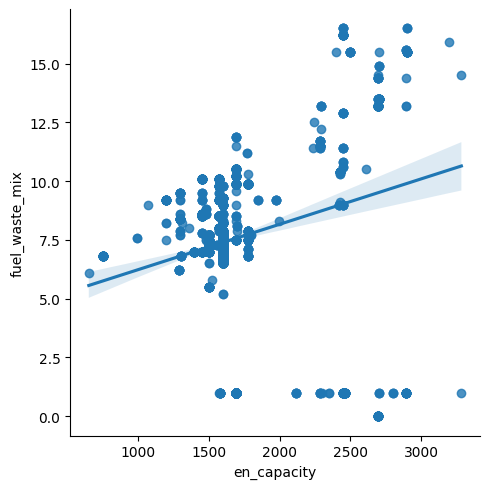

In [19]:
sns.lmplot(df, x="en_capacity", y="fuel_waste_mix")

Как видно, на регрессионную прямую оказывают сильное влияние явно некорректно низкие значения меньше 2,5 л/100 км. Для исправления используем средний расход по модели

In [20]:
wrong_waste = df[df.fuel_waste_mix < 2.5]
right_waste = df[df.fuel_waste_mix > 2.5]
for i in wrong_waste.index:
    brand = wrong_waste.loc[i, "brand"]
    model = wrong_waste.loc[i, "model"]
    df.loc[i, "fuel_waste_mix"] = round(right_waste[(right_waste.brand == brand) & 
                                                    (right_waste.model == model)].fuel_waste_mix.mean(), 2)

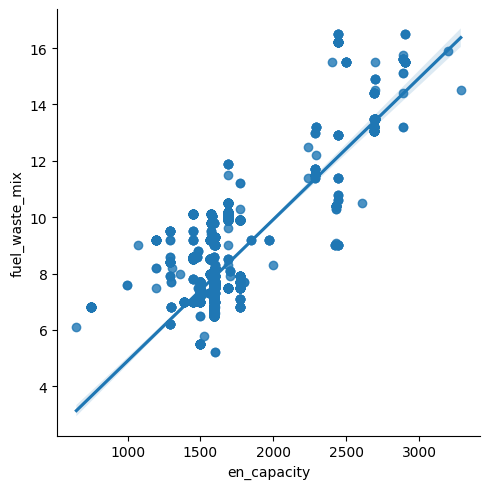

In [21]:
sns.lmplot(df, x="en_capacity", y="fuel_waste_mix")

После исправлений наблюдается довольно четкая положительная корреляция между объемом двигателя и расходом топлива. Применим линейную регрессию для заполнения пустых значений

In [22]:
waste_na = df[df.fuel_waste_mix.isna()]
waste_filled = df[~df.fuel_waste_mix.isna()]
waste_na = waste_na[waste_na.en_capacity <= waste_filled.en_capacity.max()]
linereg = LinearRegression()
model = linereg.fit(waste_filled.en_capacity.values.reshape(-1, 1), waste_filled.fuel_waste_mix.values)
waste_na.loc[:, "fuel_waste_mix"] = model.predict(waste_na.en_capacity.values.reshape(-1, 1))
for i in waste_na.index:
    df.loc[i, "fuel_waste_mix"] = round(waste_na.loc[i, "fuel_waste_mix"])

c:\users\александр\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\александр\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\александр\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\александр\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

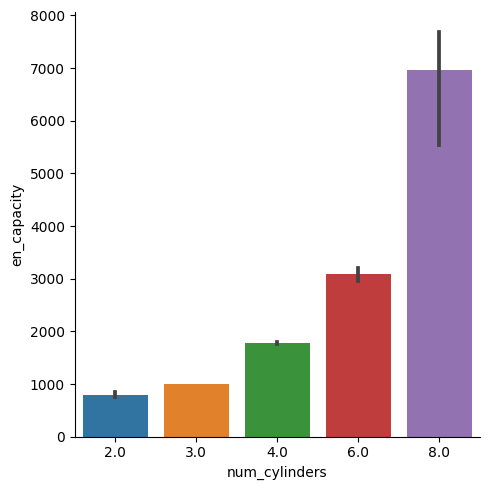

In [23]:
sns.catplot(df, x="num_cylinders", y="en_capacity", kind="bar")

Объем двигателя растет при увеличении количества цилиндров. Применим линейную регрессию и с целью классификации

In [24]:
classifier = SGDClassifier()
cyl_na = df[df.num_cylinders.isna()]
cyl_filled = df[~df.num_cylinders.isna()]
model = classifier.fit(cyl_filled.en_capacity.values.reshape(-1, 1), y=cyl_filled.num_cylinders.values)
cyl_na.loc[:, "num_cylinders"] = model.predict(cyl_na.en_capacity.values.reshape(-1, 1))
for i in cyl_na.index:
    df.loc[i, "num_cylinders"] = cyl_na.loc[i, "num_cylinders"]

In [25]:
df.isna().sum()

vin               4363
is_owner             0
is_promo          4363
region               0
city                 0
brand                0
model                0
year                 0
mileage              0
count_owners         0
air_condition        0
color                0
price                0
en_capacity          0
en_type              0
en_power             0
num_cylinders        0
fuel_waste_mix       3
body_type            0
modification         0
num_doors            0
gearbox_type         0
wheel_drive          7
steering_wheel       0
link                 0
ad_date              0
avito_id             0
model_uid            0
dtype: int64

После всех преобразований пустых значений почти не осталось. Но датасет все еще имеет некоторые проблемы. Оценим распределение автомобилей по годам

In [26]:
periods = pd.cut(df.year, [1900, 1980, 2000, 2010, 2015, 2020, 2024], include_lowest=True).value_counts(sort=False, normalize=True) * 100

Очень подозрительно, что почти 80% наших автомобилей 2023 года выпуска (год отбора информации), учитывая, что отбор проводился по поддержанным автомобилям. Это нерешенная проблема парсера, но нам опять может помочь url, в котором содержится заявленный год выпуска автомобиля

In [27]:
df["new"] = df["link"].str.split("/").str[-1].str.split("_")
wrong_year_i = df[df["year"] >= 2023]
for i in wrong_year_i.index:
    year_url = int(list(filter(lambda txt: len(txt) == 4 and txt.isdigit(), df.loc[i, "new"]))[-1])
    df.loc[i, "year"] = year_url

In [28]:
pd.cut(df.year, [1900, 1980, 2000, 2010, 2015, 2020, 2024], include_lowest=True).value_counts(sort=False, normalize=True) * 100

year
(1899.999, 1980.0]     1.031400
(1980.0, 2000.0]       9.351364
(2000.0, 2010.0]      38.345175
(2010.0, 2015.0]      25.487050
(2015.0, 2020.0]      19.848728
(2020.0, 2024.0]       5.936282
Name: proportion, dtype: float64

Теперь распределение выглядит более похожим на реальность.
Также много проблем имеется с регионами и городами. При этом регион является одним из важнейших показателей в будущем анализе датасета. В самом начале был определен словарь с названиями и кодами регионов. Проверим какие регионы не совпадают с ним

In [29]:
reg_names = regions.values()
wrong_reg = df[~df["region"].isin(reg_names)]
wrong_reg.region.unique()    

array(['Иваново', 'Тверь', 'Ярославль', 'ул. Гоголя', 'Великий Новгород',
       'ул. Ворошилова', 'Октябрьский район', 'Кострома',
       'МЦД-2 Курско-Рижский диаметр', 'ул. Чкалова', 'Мурманск',
       'Советская ул.', 'Первомайская ул.', 'Прудовая ул.', 'Лесной пр-т',
       'Устиновский район', 'Воткинское ш.',
       'ул. Строителя Николая Шишкина', 'Объячево', 'Оренбург',
       'Шоссейная ул.', '49-50-й квартал', 'ул. Блюхера', 'Курган',
       'ул. Маршала Чуйкова', 'пр-т Строителей', 'пр-т Химиков',
       'ул. Цвиллинга', 'Кизильская ул.', 'Пермь', 'ул. Фрунзе',
       'ул. Викулова', 'Тюмень', 'Тюменский район', 'ул. Ленина',
       'Новосибирск', 'ул. Петухова', 'ул. 9-й Гвардейской Дивизии',
       'Республика Алтай', 'Иркутск', 'ул. Дьяченко', 'А-331 Вилюй',
       'Береговая ул.', 'Сибирская ул.', 'Нижний Новгород', 'Астрахань',
       'ул. Карбышева', 'Омск', 'ул. Тухачевского', 'Тополиная ул.',
       'Курск', 'ул. 60 лет Октября', 'пр-т Доватора', 'Россия',
       'Р

Заметны несколько проблем:
1. Регион в Осетии определяется как 'Республика Северная Осетия - какой-то район' 
2. Вместо региона - город. Вместо города - улица
3. Вместо региона - улица. Город корректный
4. Улица и номер дома вместо регисона и города

Начнем с проблемы № 1

In [30]:
wrong_reg.loc[:, "new"] = wrong_reg.region.str.split(" — ").str[0]
for reg in regions.values():
    for name in wrong_reg.new.unique():
        if reg.startswith(name):
            i_short = wrong_reg[wrong_reg["new"] == name].index
            df.loc[i_short, "region"] = reg
wrong_reg = df[~df["region"].isin(reg_names)]
right_reg = df[df["region"].isin(reg_names)]
correct_cities = right_reg["city"].unique()
correct_cities_db = cities_db["city"].values
correct_cities = np.unique(np.concatenate((correct_cities, correct_cities_db)))

Проблема № 2 решается с использованием города, подставляя соответствующий ему регион в той части базы данных, значения в которой корректны. Решение предполагает риск некорректного заполнения региона для названий тех городов, которые есть в разных регионах. Но риск некритичен. Похожим образом решается проблема № 3 поскольку имеется город

In [31]:
reg_is_city = wrong_reg[wrong_reg["region"].isin(correct_cities)]
df.loc[reg_is_city.index, "city"] = df.loc[reg_is_city.index, "region"]
for i in reg_is_city.index:
    correct_reg = right_reg[right_reg["city"] == reg_is_city.loc[i, "region"]]["region"].unique()
    if len(correct_reg) == 1:
        df.loc[i, "region"] = correct_reg[0]
    elif len(correct_reg) == 0:
        correct_reg = cities_db[cities_db["city"] == reg_is_city.loc[i, "region"]]["region_code"].values
        if len(correct_reg) == 1:
            df.loc[i, "region"] = regions[str(correct_reg[0])]
wrong_reg = df[~df["region"].isin(reg_names)]
right_reg = df[df["region"].isin(reg_names)]

In [34]:
for i in wrong_reg.index:
    i_city = np.where(correct_cities.astype(str) == wrong_reg.loc[i, "city"])[0]
    if len(i_city) == 1:
        df.loc[i, "city"] = correct_cities[i_city[0]]
        correct_reg = right_reg[right_reg["city"] == df.loc[i, "city"]]["region"].unique()
        if len(correct_reg) == 1:
            df.loc[i, "region"] = correct_reg[0]
        elif len(correct_reg) == 0:
            correct_reg = cities_db[cities_db["city"] == wrong_reg.loc[i, "city"]]["region_code"].values
            if len(correct_reg) == 1:
                df.loc[i, "region"] = regions[str(correct_reg[0])]
wrong_reg = df[~df["region"].isin(reg_names)]
right_reg = df[df["region"].isin(reg_names)]

Осталась проблема № 4. Для ее решения придется использовать город в url, а дальше действовать аналогично, подставляя регион из корректных данных. Переводить латиницу будем при помощи transliterate, а в сложных случаях API Yandex translate

In [42]:
wrong_reg.loc[:, "new"] = wrong_reg["link"].str.split("/").str[3].map(lambda x: trsl.translit(x, "ru"))
wrong_reg.loc[:, "new"] = wrong_reg.new.map(lambda word: word[:-1] + "й" if word[-2:] == "ыы" else word)
wrong_reg.loc[:, "new"] = wrong_reg.new.map(lambda word: word[:-1] + "й" if word[-2:] == "иы" else word)
wrong_reg.loc[:, "new"] = wrong_reg.new.map(lambda word: re.sub(r"ыа", "я", word))
for i in wrong_reg.index:
    if wrong_reg.loc[i, "new"] == "москва":
        df.loc[i, "city"] = df.loc[i, "region"]
        df.loc[i, "region"] = "Москва"
    i_city = np.where(np.char.lower(correct_cities.astype(str)) == wrong_reg.loc[i, "new"])[0]
    if len(i_city) == 1:
        df.loc[i, "city"] = correct_cities[i_city[0]]
        correct_reg = right_reg[right_reg["city"] == df.loc[i, "city"]]["region"].unique()
        if len(correct_reg) == 1:
            df.loc[i, "region"] = correct_reg[0]
        elif len(correct_reg) == 0:
            correct_reg = cities_db[cities_db["city"].str.lower() == wrong_reg.loc[i, "new"]]["region_code"].values
            if len(correct_reg) == 1:
                df.loc[i, "region"] = regions[str(correct_reg[0])]
    else:
        real_city = translate("city " + wrong_reg.loc[i, "link"].split("/")[3], IAM_TOKEN, folder_id)[6:]
        if real_city != wrong_reg.loc[i, "new"]:
            df.loc[i, "city"] = real_city
            correct_reg = right_reg[right_reg["city"] == df.loc[i, "city"]]["region"].unique()
            if len(correct_reg) == 1:
                df.loc[i, "region"] = correct_reg[0]
            elif len(correct_reg) == 0:
                correct_reg = cities_db[cities_db["city"].str.lower() == wrong_reg.loc[i, "new"]]["region_code"].values
                if len(correct_reg) == 1:
                    df.loc[i, "region"] = regions[str(correct_reg[0])]            

In [43]:
wrong_reg = df[~df["region"].isin(reg_names)]
wrong_reg[["region", "city"]]

,region,city
616,ул. Чкалова,Петрозаводск
764,Прудовая ул.,Удмуртия_Завьялово
814,Объячево,Объячево
1121,пр-т Строителей,Нижнекамск
1146,пр-т Химиков,Нижнекамск
1465,Тюменский район,Каскара
1574,ул. Ленина,Муравленко
1666,ул. Дьяченко,Амурская_Область_Благовещенск
1704,А-331 Вилюй,Усть-Кут
2070,ул. Тухачевского,Кемерово


Оставшиеся регионы можно проставить вручную, используя следующую функцию

In [44]:
def check_regions_manual(df):
    """
    Manually fill values about a city and a region haven't been fixed with the check_regions function
    :param df: a dataframe with all information
    :return: no return. Change the input dataframe
    """
    reg_names = regions.values()
    wrong_reg = df[~df["region"].isin(reg_names)]
    right_reg = df[df["region"].isin(reg_names)]
    wrong_reg.loc[:, "new"] = wrong_reg["link"].str.split("/").str[3].map(lambda x: trsl.translit(x, "ru"))
    for i in wrong_reg.index:
        city = input(
            f"Enter the right city. Enter 0 to drop the row. The city name from url is: \n{wrong_reg.loc[i, 'city'].capitalize()}")
        if city == "0":
            df.drop(labels=i, inplace=True)
        else:
            df.loc[i, "city"] = city
            correct_reg = right_reg[right_reg["city"] == df.loc[i, "city"]]["region"].unique()
            if len(correct_reg) == 1:
                region = input(
                    f"Enter the right region. Enter 1 if the region is {correct_reg[0]}. Otherwise enter code of the region")
                if region == "1":
                    df.loc[i, "region"] = correct_reg[0]
                else:
                    df.loc[i, "region"] = regions[region]
            else:
                region = input(f"Enter the code of the right region")
                df.loc[i, "region"] = regions[region]

In [45]:
df.isna().sum()

vin               4363
is_owner             0
is_promo          4363
region               0
city                 0
brand                0
model                0
year                 0
mileage              0
count_owners         0
air_condition        0
color                0
price                0
en_capacity          0
en_type              0
en_power             0
num_cylinders        0
fuel_waste_mix       3
body_type            0
modification         0
num_doors            0
gearbox_type         0
wheel_drive          7
steering_wheel       0
link                 0
ad_date              0
avito_id             0
model_uid            0
new                  0
dtype: int64

Можно удалить оставшиеся NaN значения перед загрузкой в базу данных, можно оставить если их наличие некритично